In [2]:
## importing libraries

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics
#import mathzo
from numpy import mean
from numpy import std

from sklearn.metrics import mean_squared_error, r2_score

print('Done importing libraries')

Done importing libraries


In [3]:
## reading in the datasets

df2 = pd.read_csv("data/fixed_delhi_pollutant1.csv")
df2.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df2.drop(["a"], axis=1, inplace=True)
df = pd.read_csv("data/fixed_api_delhi_2015.csv")

Ozone = df2['O3']

OzoneP24 = Ozone.shift(-24)
OzoneP24 = OzoneP24.replace(np.nan, 54.94)
df2['O3P24'] = OzoneP24


# importing weather ones

df2['Temp'] = df['Temperature']
df2['Humid'] = df['Relative Humidity']
df2['Cloud'] = df['Cloud Cover']
df2['Press'] = df['Sea Level Pressure']
df2['Press'].fillna(value=df2['Press'].mean(), inplace = True)
df2['PM10'].fillna(value=df2['PM10'].mean(), inplace=True)

# print done

## seasons

# winter- len 1415

winterStart = 0
winterEnd = 1415

winterStart2 = 8015

# spring- len 2208
springStart = 1415
springEnd = 3623

# summer- len 2208
summerStart = 3623
summerEnd = 5831

# fall- 2184
fallStart = 5831
fallEnd = 8015

# all- len 8758
allStart = 0
allEnd = 8758

print('Done importing columns')
#df2 = df2[springStart:springEnd]

df2 = df2[:8758]
print(df2.columns, len(df2))
print(df2.info())

Done importing columns
Index(['City', 'Date', 'Time', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'O3P24', 'Temp',
       'Humid', 'Cloud', 'Press'],
      dtype='object') 8758
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     8758 non-null   object 
 1   Date     8758 non-null   object 
 2   Time     8758 non-null   object 
 3   PM2.5    8758 non-null   float64
 4   PM10     8758 non-null   float64
 5   NO       8758 non-null   float64
 6   NO2      8758 non-null   float64
 7   NOx      8758 non-null   float64
 8   NH3      8758 non-null   float64
 9   CO       8758 non-null   float64
 10  SO2      8758 non-null   float64
 11  O3       8758 non-null   float64
 12  Benzene  8758 non-null   float64
 13  Toluene  8758 non-null   float64
 14  Xylene   8758 non-null   float64
 15  O3P24  

Index(['City', 'Date', 'Time', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'O3P24', 'Temp',
       'Humid', 'Cloud', 'Press'],
      dtype='object')


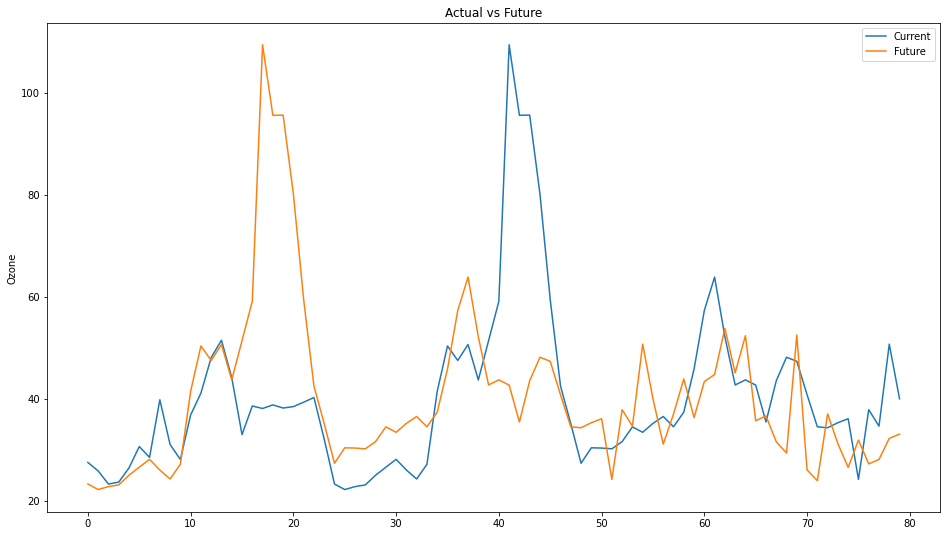

In [4]:
print(df2.columns)
# OzoneP24 = Ozone.shift(24)
# OzoneP24 = OzoneP24.replace(np.nan, 54.94)
# df2['O3P24'] = OzoneP24

actual = df2['O3'][200:280]
pred = df2['O3P24'][200:280]
plt.figure(figsize=(16,9))
plt.plot( list(actual))
plt.plot( list(pred))
plt.title("Actual vs Future")
plt.ylabel("Ozone")
plt.legend(('Current','Future'))
plt.show()

In [5]:
## defining variables

#X = df2[['PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'Toluene', 'Temp']] # , 'Humid', Xylene
X = df2[['PM10', 'NO', 'NO2', 'NH3','CO', 'SO2', 'O3', 'Toluene', 'Xylene', 'Temp']]

y = df2['O3P24']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.1)

print("Size of training dataset: {} rows".format(X_train1.shape[0]))
print("Size of testing dataset: {} rows".format(X_test1.shape[0]))

print('Done defining variables')

Size of training dataset: 7882 rows
Size of testing dataset: 876 rows
Done defining variables


In [6]:
## scaling variables

'''importing libraries'''
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# robust scaler showed the most promising results

scaler = preprocessing.RobustScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.fit_transform(X_test1)

print('Done scaling :)')

Done scaling :)


In [7]:
## linear regression
t0 = time.time()

'''importing library'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold

'''create linear regressor object'''
lnRegressor = LinearRegression()

'''fitting regressor'''
lnRegressor.fit(X_train1, y_train)

# cv stuff

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

cvln_r2scores = cross_val_score(lnRegressor, X_train1, y_train, cv = 10, scoring = 'r2')
print(cvln_r2scores)
cvln_rmsescores = cross_val_score(lnRegressor, X_train1, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print(cvln_rmsescores)
cvln_maescores = cross_val_score(lnRegressor, X_train1, y_train, cv = 10, scoring = 'neg_mean_absolute_error')
print(cvln_maescores)

# calculating r^2 adj score

cvln_adj = []

n = len(X_train1)
k = len(X_train1.columns)
for r in cvln_r2scores:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cvln_adj.append(adj_r2)    

cvln_r2score = round((np.mean(cvln_r2scores)), 4)
cvln_adjscore = round((np.mean(cvln_adj)), 4)
cvln_rmsescore = int(round(abs(np.mean(cvln_rmsescores))))
cvln_maescore = int(round(abs(np.mean(cvln_maescores))))


print(cvln_r2score, cvln_adjscore, cvln_rmsescore, cvln_maescore)

t1 = time.time()
total = t1-t0

print("done training linear regressor | time taken: %f seconds" %total)
yPredln = lnRegressor.predict(X_test1)
print('The R^2 value for linear Regressor is :', round((r2_score(y_test, yPredln)), 4))

# 0.3918 0.3909 26 18 79.33

[0.36766935 0.4092611  0.37536401 0.40583106 0.43725652 0.40474328
 0.38713758 0.43241357 0.39447184 0.34757432]
[-28.20848835 -25.79058552 -26.19744991 -26.17263476 -24.44563378
 -25.73810895 -26.37690099 -24.92220904 -26.45912651 -27.1448215 ]
[-18.93870935 -17.41854476 -17.83727204 -18.38596054 -17.5620091
 -17.85455341 -17.85377062 -17.6767892  -18.61021517 -18.55676859]
0.3962 0.3954 26 18
done training linear regressor | time taken: 0.216301 seconds
The R^2 value for linear Regressor is : 0.3654


In [8]:
## kneighbors regression
print("STARTING: KN")

t0 = time.time()

'''importing library'''
from sklearn.neighbors import KNeighborsRegressor

'''create regressor object'''
knRegressor = KNeighborsRegressor(n_neighbors = 4, metric = 'minkowski', p = 1)

'''fitting regressor'''
knRegressor.fit(X_train_scaled1, y_train)

# cv stuff

cvkn_r2scores = cross_val_score(knRegressor, X_train1, y_train, cv = 10, scoring = 'r2')
print(cvkn_r2scores)
cvkn_rmsescores = cross_val_score(knRegressor, X_train1, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print(cvkn_rmsescores)
cvkn_maescores = cross_val_score(knRegressor, X_train1, y_train, cv = 10, scoring = 'neg_mean_absolute_error')
print(cvkn_maescores)

 # need to test this out // it's fine

# calculating r^2 adj score

cvkn_adj = []

n = len(X_train1)
k = len(X_train1.columns)
for r in cvkn_r2scores:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cvkn_adj.append(adj_r2)    

cvkn_r2score = round((np.mean(cvkn_r2scores)), 4)
cvkn_adjscore = round((np.mean(cvkn_adj)), 4)
cvkn_rmsescore = int(round(abs(np.mean(cvkn_rmsescores))))
cvkn_maescore = int(round(abs(np.mean(cvkn_maescores))))

print(cvkn_r2score, cvkn_adjscore, cvkn_rmsescore, cvkn_maescore)


t1 = time.time()
total = t1-t0

print("done training knn regressor | time taken: %f seconds" %total)

yPredkn = knRegressor.predict(X_test_scaled1)
print('The R^2 value for KNN Regressor is :', round((r2_score(y_test, yPredkn)), 4))

# 0.546 0.5453 22 15 40.69 with cloud and temp
# 0.4814 0.4808 24 16 45.019999999999996

STARTING: KN
[0.50368368 0.47315434 0.49278081 0.49615893 0.56509252 0.53136084
 0.46772885 0.52635835 0.58768628 0.51810852]
[-24.9911922  -24.35595273 -23.60713885 -24.10123247 -21.49040017
 -22.83724788 -24.58152023 -22.76645831 -21.83344292 -23.32899831]
[-16.12147972 -15.8688609  -15.43574556 -16.00408154 -14.92299651
 -15.18461294 -15.54416402 -15.62229854 -14.92678299 -15.76317655]
0.5162 0.5156 23 16
done training knn regressor | time taken: 0.870961 seconds
The R^2 value for KNN Regressor is : 0.5791


In [9]:
## svr regressor
print("STARTING: SVR")

t0 = time.time()

'''importing library'''
from sklearn.svm import SVR

'''create regressor object'''
svrRegressor = SVR(C = 10, gamma = 0.1, kernel= 'rbf')

'''fitting regressor'''
svrRegressor.fit(X_train_scaled1, y_train)

# cv stuff

cvsvr_r2scores = cross_val_score(svrRegressor, X_train_scaled1, y_train, cv = 10, scoring = 'r2')
print(cvsvr_r2scores)
cvsvr_rmsescores = cross_val_score(svrRegressor, X_train1, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print(cvsvr_rmsescores)
cvsvr_maescores = cross_val_score(svrRegressor, X_train1, y_train, cv = 10, scoring = 'neg_mean_absolute_error')
print(cvsvr_maescores)


# calculating r^2 adj score

cvsvr_adj = []

n = len(X_train1)
k = len(X_train1.columns)
for r in cvsvr_r2scores:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cvsvr_adj.append(adj_r2)

cvsvr_r2score = round((np.mean(cvsvr_r2scores)), 4)
cvsvr_adjscore = round((np.mean(cvsvr_adj)), 4)
cvsvr_rmsescore = int(round(abs(np.mean(cvsvr_rmsescores))))
cvsvr_maescore = int(round(abs(np.mean(cvsvr_maescores))))

print(cvsvr_r2score, cvsvr_adjscore, cvsvr_rmsescore, cvsvr_maescore)

t1 = time.time()
total = t1-t0

print("done training svr regressor | time taken: %f seconds" %total)

yPredsvr = svrRegressor.predict(X_test_scaled1)
print('The R^2 value for SVR Regressor is :', round((r2_score(y_test, yPredsvr)), 4))

STARTING: SVR
[0.45772789 0.43706584 0.4169225  0.48487877 0.5444757  0.48426133
 0.47288099 0.50971347 0.4567701  0.42651654]
[-36.22433772 -34.13523782 -33.58628116 -34.35768661 -32.70287717
 -33.63310696 -33.8935884  -33.36715489 -34.65132083 -34.06074342]
[-26.85408136 -25.73417216 -25.38192595 -26.09466482 -25.67948583
 -25.90398316 -25.15456334 -25.35579932 -26.0870462  -26.56966966]
0.4691 0.4684 34 26
done training svr regressor | time taken: 78.706055 seconds
The R^2 value for SVR Regressor is : 0.4476


In [10]:
### adaboost performs better more variables- not impacted by multicollinearity

In [11]:
## defining variables WITH MULTICOLLINEARITY: random forest, decision tree, maybe adaboost, and xgboost

X = df2[['PM10', 'NO', 'NO2', 'NOx', 'NH3','CO', 'SO2', 'O3', 'Toluene', 'Xylene', 'Temp', 'Cloud']]

y = df2['O3P24']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.1)

print("Size of training dataset: {} rows".format(X_train.shape[0]))
print("Size of testing dataset: {} rows".format(X_test.shape[0]))

print('Done defining NEW variables')

Size of training dataset: 7882 rows
Size of testing dataset: 876 rows
Done defining NEW variables


In [12]:
# ## scaling variables

# scaler = preprocessing.RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled2 = scaler.fit_transform(X_test2)

# print('Done scaling')

In [13]:
## random forest regressor
print("STARTING: rf")
t0 = time.time()

'''importing library'''
from sklearn.ensemble import RandomForestRegressor

'''create regressor object'''
rfRegressor = RandomForestRegressor(max_depth=50, random_state=0, n_estimators=250) 

'''fitting regressor'''
rfRegressor.fit(X_train, y_train)

# cv stuff

cvrf_r2scores = cross_val_score(rfRegressor, X_train, y_train, cv = 10, scoring = 'r2') # x_train was scaled for some reason, check if it changes things?
print(cvrf_r2scores)
cvrf_rmsescores = cross_val_score(rfRegressor, X_train, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print(cvrf_rmsescores)
cvrf_maescores = cross_val_score(rfRegressor, X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error')
print(cvrf_maescores)


# calculating r^2 adj score

cvrf_adj = []

n = len(X_train)
k = len(X_train.columns)
for r in cvrf_r2scores:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cvrf_adj.append(adj_r2)

cvrf_r2score = round((np.mean(cvrf_r2scores)), 4)
cvrf_adjscore = round((np.mean(cvrf_adj)), 4)
cvrf_rmsescore = int(round(abs(np.mean(cvrf_rmsescores))))
cvrf_maescore = int(round(abs(np.mean(cvrf_maescores))))

print(cvrf_r2score, cvrf_adjscore, cvrf_rmsescore, cvrf_maescore)

print(cvrf_r2score, cvrf_adjscore)

t1 = time.time()
total = t1-t0

print("done training random forest regressor | time taken: %f seconds" %total)
yPredrf = rfRegressor.predict(X_test)
print('The R^2 value for Random Forest Regressor is :', round((r2_score(y_test, yPredrf)), 4))

## printing feature importances


importances = rfRegressor.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

print('feature importances:::')
print(sorted_indices)

STARTING: rf
[0.56053812 0.6012821  0.59607748 0.61251217 0.65088837 0.63875236
 0.59779195 0.63846728 0.61830069 0.56140309]
[-23.51626261 -21.18830834 -21.06660496 -21.13593688 -19.25432158
 -20.0505824  -21.36818584 -19.89043761 -21.0072411  -22.2563657 ]
[-14.82241197 -13.80784784 -13.88026488 -14.30545912 -13.31456599
 -13.41278371 -13.48007935 -13.68299533 -14.44354278 -14.42258948]
0.6076 0.607 21 14
0.6076 0.607
done training random forest regressor | time taken: 323.508322 seconds
The R^2 value for Random Forest Regressor is : 0.5849
feature importances:::
[ 7 10  6  9  0  4  2  5  8  3  1 11]


In [14]:
## decision tree regressor
print('STARTING: dt')
t0 = time.time()

'''importing library'''
from sklearn.tree import DecisionTreeRegressor

'''create regressor object'''
dtRegressor = DecisionTreeRegressor(random_state=0, max_depth = 6)

'''fitting regressor'''
dtRegressor.fit(X_train,y_train)

# cv stuff

cvdt_r2scores = cross_val_score(dtRegressor, X_train, y_train, cv = 10, scoring = 'r2')
print(cvdt_r2scores)
cvdt_rmsescores = cross_val_score(dtRegressor, X_train, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print(cvdt_rmsescores)
cvdt_maescores = cross_val_score(dtRegressor, X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error')
print(cvdt_maescores)


# calculating r^2 adj score

cvdt_adj = []

n = len(X_train)
k = len(X_train.columns)
for r in cvdt_r2scores:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cvdt_adj.append(adj_r2)

cvdt_r2score = round((np.mean(cvdt_r2scores)), 4)
cvdt_adjscore = round((np.mean(cvdt_adj)), 4)
cvdt_rmsescore = int(round(abs(np.mean(cvdt_rmsescores))))
cvdt_maescore = int(round(abs(np.mean(cvdt_maescores))))

print(cvdt_r2score, cvdt_adjscore, cvdt_rmsescore, cvdt_maescore)

t1 = time.time()
total = t1-t0

print("done training decision tree regressor | time taken: %f seconds" %total)

yPreddt = dtRegressor.predict(X_test)
print('The R^2 value for Decision Tree Regressor is :', round((r2_score(y_test, yPreddt)), 4))

# 0.41 0.409
# : 0.4224
# 0.4153 0.4144 removed cloud
# , 'Cloud' 0.4186

# without cloud [0.36750345 0.47306772 0.37010863 0.49341272 0.36120798 0.46114263, 0.40563344 0.42481846 0.41647005 0.37968079]
# with cloud

STARTING: dt
[0.41168646 0.43000607 0.39909567 0.43083749 0.48931837 0.43741431
 0.45222868 0.44153163 0.31553478 0.3524405 ]
[-27.20897103 -25.33369477 -25.69497419 -25.61595875 -23.28740955
 -25.02181561 -24.93686869 -24.72121567 -28.13092572 -27.04340093]
[-18.29039222 -16.8999194  -16.98592922 -17.95906721 -16.38554695
 -17.22079339 -16.9266141  -17.24726512 -18.60665147 -18.1434329 ]
0.416 0.4151 26 17
done training decision tree regressor | time taken: 0.935404 seconds
The R^2 value for Decision Tree Regressor is : 0.4136


In [15]:
## adaboost regressor
print('STARTING: adaboost regressor')
t0 = time.time()

'''importing library'''
from sklearn.ensemble import AdaBoostRegressor

'''create regressor object'''
adaRegressor = AdaBoostRegressor(random_state=0, learning_rate = 0.1, n_estimators=100)

'''fitting regressor'''
adaRegressor.fit(X_train, y_train)

# cv stuff

cvada_r2scores = cross_val_score(adaRegressor, X_train, y_train, cv = 10, scoring = 'r2')
print(cvada_r2scores)
cvada_rmsescores = cross_val_score(adaRegressor, X_train, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print(cvada_rmsescores)
cvada_maescores = cross_val_score(adaRegressor, X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error')
print(cvada_maescores)

# calculating r^2 adj score

cvada_adj = []

n = len(X_train)
k = len(X_train.columns)
for r in cvada_r2scores:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cvada_adj.append(adj_r2)

cvada_r2score = round((np.mean(cvada_r2scores)), 4)
cvada_adjscore = round((np.mean(cvada_adj)), 4)
cvada_rmsescore = int(round(abs(np.mean(cvada_rmsescores))))
cvada_maescore = int(round(abs(np.mean(cvada_maescores))))

print(cvada_r2score, cvada_adjscore, cvada_rmsescore, cvada_maescore)

t1 = time.time()
total = t1-t0

print("done training Adaboost regressor | time taken: %f seconds" %total)

yPredada = adaRegressor.predict(X_test)
print('The R^2 value for Adaboost Regressor is :', round((r2_score(y_test, yPredada)), 4))

STARTING: adaboost regressor
[0.37417045 0.36855002 0.36771989 0.35960509 0.3298731  0.37174863
 0.33833353 0.37296786 0.3558971  0.32959281]
[-28.06310564 -26.66446627 -26.35726114 -27.17167461 -26.67623856
 -26.44181134 -27.4070214  -26.19482098 -27.28889538 -27.51634829]
[-20.74921016 -19.86205356 -20.15011844 -20.95969304 -21.30779237
 -20.61400298 -20.73791376 -20.29395997 -21.26797388 -20.7571871 ]
0.3568 0.3559 27 21
done training Adaboost regressor | time taken: 41.441942 seconds
The R^2 value for Adaboost Regressor is : 0.3472


In [16]:
## xgboost regressor
print('STARTING: xgboost regressor')
t0 = time.time()

'''importing library'''
import xgboost as xgb

'''create regressor object'''
xgbRegressor = xgb.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=300, verbosity = 0, random_state = 0, silent = True)

'''fitting regressor'''
xgbRegressor.fit(X_train, y_train)

# cv stuff

cvxgb_r2scores = cross_val_score(xgbRegressor, X_train, y_train, cv = 10, scoring = 'r2')
print(cvxgb_r2scores)
cvxgb_rmsescores = cross_val_score(xgbRegressor, X_train, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print(cvxgb_rmsescores)
cvxgb_maescores = cross_val_score(xgbRegressor, X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error')
print(cvxgb_maescores)


# calculating r^2 adj score

cvxgb_adj = []

n = len(X_train)
k = len(X_train.columns)
for r in cvxgb_r2scores:
    adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
    cvxgb_adj.append(adj_r2)

cvxgb_r2score = round((np.mean(cvxgb_r2scores)), 4)
cvxgb_adjscore = round((np.mean(cvxgb_adj)), 4)
cvxgb_rmsescore = int(round(abs(np.mean(cvxgb_rmsescores))))
cvxgb_maescore = int(round(abs(np.mean(cvxgb_maescores))))

print(cvxgb_r2score, cvxgb_adjscore, cvxgb_rmsescore, cvxgb_maescore)

t1 = time.time()
total = t1-t0

print("done training xgboost regressor | time taken: %f seconds" %total)

yPredxgb = xgbRegressor.predict(X_test)
print('The R^2 value for xgboost Regressor is :', round((r2_score(y_test, yPredxgb)), 4))

STARTING: xgboost regressor
[0.57987023 0.59655571 0.61727613 0.62234472 0.64271181 0.64231678
 0.61931537 0.64274372 0.62493521 0.58640056]
[-22.99320034 -21.31352104 -20.50634648 -20.86605033 -19.47849476
 -19.95141769 -20.7885858  -19.77244928 -20.82387174 -21.61282   ]
[-14.3156743  -13.79236455 -13.45137073 -13.99851407 -13.26142574
 -13.38725382 -12.94851279 -13.46863011 -13.88474663 -13.93626262]
0.6174 0.6169 21 14
done training xgboost regressor | time taken: 81.308000 seconds
The R^2 value for xgboost Regressor is : 0.5805


[0.02190335 0.02438129 0.03847366 0.03289353 0.04848855 0.05253262
 0.06388511 0.38613886 0.04372949 0.1115993  0.13264148 0.04333269]


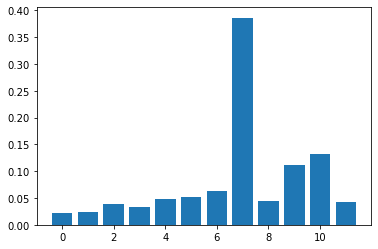

In [17]:
## try finding the variable importance for xgboost after running


# plot feature importance
print(xgbRegressor.feature_importances_)


# plot
plt.bar(range(len(xgbRegressor.feature_importances_)), xgbRegressor.feature_importances_)
plt.show()

In [18]:
##### printing cross-validations scores
# printing cross-validaion r^2 scores

print('The R^2 value for Linear Regression is         :', cvln_r2score)
print('The R^2 value for KNN Regressor is             :', cvkn_r2score)
print('The R^2 value for SVM Regressor is             :', cvsvr_r2score)
print('The R^2 value for Random Forests Regressor is  :', cvrf_r2score)
print('The R^2 value for Decision Tree Regressor is   :', cvdt_r2score)
print('The R^2 value for AdaBoost Regressor is        :', cvada_r2score)
print('The R^2 value for XGBoost Regressor is         :', cvxgb_r2score)

The R^2 value for Linear Regression is         : 0.3962
The R^2 value for KNN Regressor is             : 0.5162
The R^2 value for SVM Regressor is             : 0.4691
The R^2 value for Random Forests Regressor is  : 0.6076
The R^2 value for Decision Tree Regressor is   : 0.416
The R^2 value for AdaBoost Regressor is        : 0.3568
The R^2 value for XGBoost Regressor is         : 0.6174


In [19]:
# printing cross-validation adjusted r^2 scores

print('The Adj. R^2 value for Linear Regression is        :', cvln_adjscore)
print('The Adj. R^2 value for KNN Regressor is            :', cvkn_adjscore)
print('The Adj. R^2 value for SVM Regressor is            :', cvsvr_adjscore)
print('The Adj. R^2 value for Random Forests Regressor is :', cvrf_adjscore)
print('The Adj. R^2 value for Decision Tree Regressor is  :', cvdt_adjscore)
print('The Adj. R^2 value for AdaBoost Regressor is       :', cvada_adjscore)
print('The Adj. R^2 value for XGBoost Regressor is        :', cvxgb_adjscore)

The Adj. R^2 value for Linear Regression is        : 0.3954
The Adj. R^2 value for KNN Regressor is            : 0.5156
The Adj. R^2 value for SVM Regressor is            : 0.4684
The Adj. R^2 value for Random Forests Regressor is : 0.607
The Adj. R^2 value for Decision Tree Regressor is  : 0.4151
The Adj. R^2 value for AdaBoost Regressor is       : 0.3559
The Adj. R^2 value for XGBoost Regressor is        : 0.6169


In [20]:
# printing cross-validation rmse scores

print('The RSME value for Linear Regression is         :', cvln_rmsescore)
print('The RSME value for KNN Regressor is             :', cvkn_rmsescore)
print('The RSME value for SVM Regressor is             :', cvsvr_rmsescore)
print('The RSME value for Random Forests Regressor is  :', cvrf_rmsescore)
print('The RSME value for Decision Tree Regressor is   :', cvdt_rmsescore)
print('The RSME value for AdaBoost Regressor is        :', cvada_rmsescore)
print('The RSME value for XGBoost Regressor is         :', cvxgb_rmsescore)

The RSME value for Linear Regression is         : 26
The RSME value for KNN Regressor is             : 23
The RSME value for SVM Regressor is             : 34
The RSME value for Random Forests Regressor is  : 21
The RSME value for Decision Tree Regressor is   : 26
The RSME value for AdaBoost Regressor is        : 27
The RSME value for XGBoost Regressor is         : 21


In [21]:
# printing cross-validation mae scores

print('The MAE value for Linear Regression is        :', cvln_maescore)
print('The MAE value for KNN Regressor is            :', cvkn_maescore)
print('The MAE value for SVM Regressor is            :', cvsvr_maescore)
print('The MAE value for Random Forests Regressor is :', cvrf_maescore)
print('The MAE value for Decision Tree Regressor is  :', cvdt_maescore)
print('The MAE value for AdaBoost Regressor is       :', cvada_maescore)
print('The MAE value for XGBoost Regressor is        :', cvxgb_maescore)



The MAE value for Linear Regression is        : 18
The MAE value for KNN Regressor is            : 16
The MAE value for SVM Regressor is            : 26
The MAE value for Random Forests Regressor is : 14
The MAE value for Decision Tree Regressor is  : 17
The MAE value for AdaBoost Regressor is       : 21
The MAE value for XGBoost Regressor is        : 14


In [22]:
### TESTING

yPredln = lnRegressor.predict(X_test1)
yPredkn = knRegressor.predict(X_test_scaled1)
yPredsvr = svrRegressor.predict(X_test_scaled1)
yPredrf = rfRegressor.predict(X_test)
yPreddt = dtRegressor.predict(X_test)
yPredada = adaRegressor.predict(X_test)
yPredxgb = xgbRegressor.predict(X_test)

predR2ln = str((round((r2_score(y_test,yPredln)), 3)))
predR2kn = str((round((r2_score(y_test,yPredkn)), 3)))
predR2svr = str((round((r2_score(y_test,yPredsvr)), 3)))
predR2rf = str((round((r2_score(y_test,yPredrf)), 3)))
predR2dt = str((round((r2_score(y_test,yPreddt)), 3)))
predR2ada = str((round((r2_score(y_test,yPredada)), 3)))
predR2xgb = str((round((r2_score(y_test,yPredxgb)), 3)))

print(predR2ln, predR2kn, predR2svr, predR2rf, predR2dt, predR2ada, predR2xgb)

0.365 0.579 0.448 0.585 0.414 0.347 0.58


The R^2 value for Linear Regression is   : 0.365


/var/folders/4s/6ngd8x116fx7tbpysyw9cv140000gr/T/ipykernel_5252/894898049.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


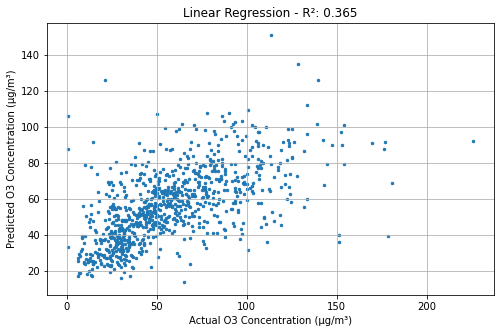

The R^2 value for KNN Regression is   : 0.579


/var/folders/4s/6ngd8x116fx7tbpysyw9cv140000gr/T/ipykernel_5252/894898049.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


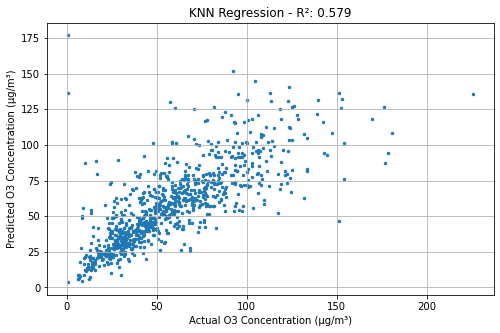

The R^2 value for SVM Regression is   : 0.448


/var/folders/4s/6ngd8x116fx7tbpysyw9cv140000gr/T/ipykernel_5252/894898049.py:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


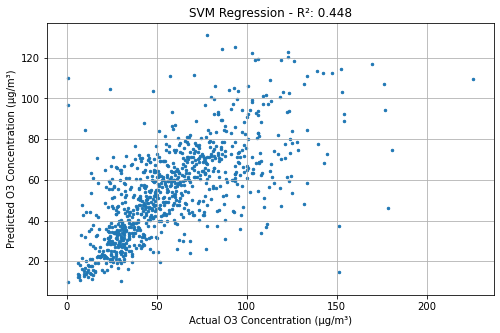

The R^2 value for Random Forests Regression is   : 0.585


/var/folders/4s/6ngd8x116fx7tbpysyw9cv140000gr/T/ipykernel_5252/894898049.py:53: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


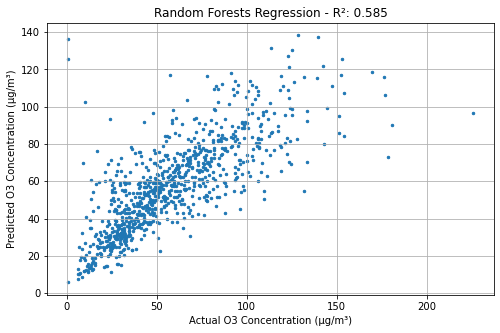

The R^2 value for Decision Tree Regression is   : 0.414


/var/folders/4s/6ngd8x116fx7tbpysyw9cv140000gr/T/ipykernel_5252/894898049.py:67: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


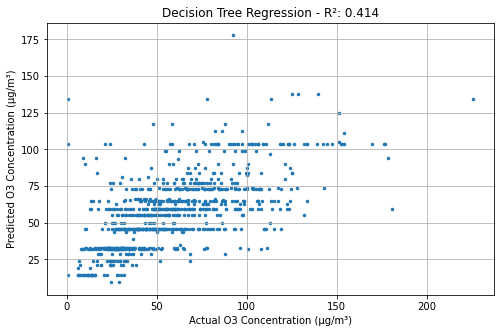

The R^2 value for AdaBoost Regression is   : 0.347


/var/folders/4s/6ngd8x116fx7tbpysyw9cv140000gr/T/ipykernel_5252/894898049.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


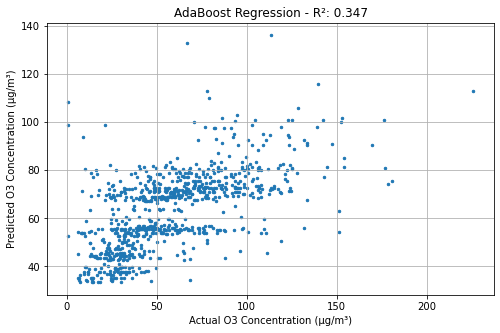

The R^2 value for XGBoost Regression is   : 0.58


/var/folders/4s/6ngd8x116fx7tbpysyw9cv140000gr/T/ipykernel_5252/894898049.py:95: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


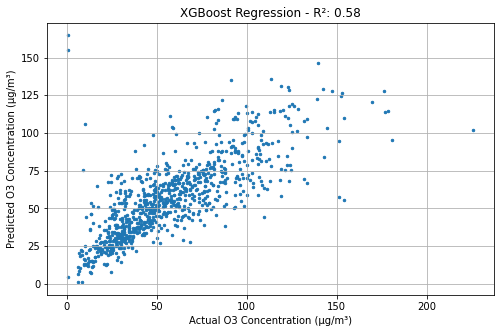

In [23]:
# ln reg


print('The R^2 value for Linear Regression is   :', round((r2_score(y_test,yPredln)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredln, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("Linear Regression - R²: %s" %predR2ln)
plt.savefig('figs/Linear Regression.png')
plt.show()


# kn reg
print('The R^2 value for KNN Regression is   :', round((r2_score(y_test,yPredkn)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredkn, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("KNN Regression - R²: %s" %predR2kn)
plt.savefig('figs/KNN Regression.png')
plt.show()


# svr reg
print('The R^2 value for SVM Regression is   :', round((r2_score(y_test,yPredsvr)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredsvr, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("SVM Regression - R²: %s" %predR2svr)
plt.savefig('figs/SVM Regression.png')
plt.show()


# rf reg
print('The R^2 value for Random Forests Regression is   :', round((r2_score(y_test,yPredrf)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredrf, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("Random Forests Regression - R²: %s" %predR2rf)
plt.savefig('figs/Random Forests Regression.png')
plt.show()


# dt reg
print('The R^2 value for Decision Tree Regression is   :', round((r2_score(y_test,yPreddt)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPreddt, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("Decision Tree Regression - R²: %s" %predR2dt)
plt.savefig('figs/Decision Tree Regression.png')
plt.show()


# ada reg
print('The R^2 value for AdaBoost Regression is   :', round((r2_score(y_test,yPredada)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredada, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("AdaBoost Regression - R²: %s" %predR2ada)
plt.savefig('figs/AdaBoost Regression.png')
plt.show()


# xgb reg
print('The R^2 value for XGBoost Regression is   :', round((r2_score(y_test,yPredxgb)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredxgb, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("XGBoost Regression - R²: %s" %predR2xgb)
plt.savefig('figs/XGBoost Regression.png')
plt.show()

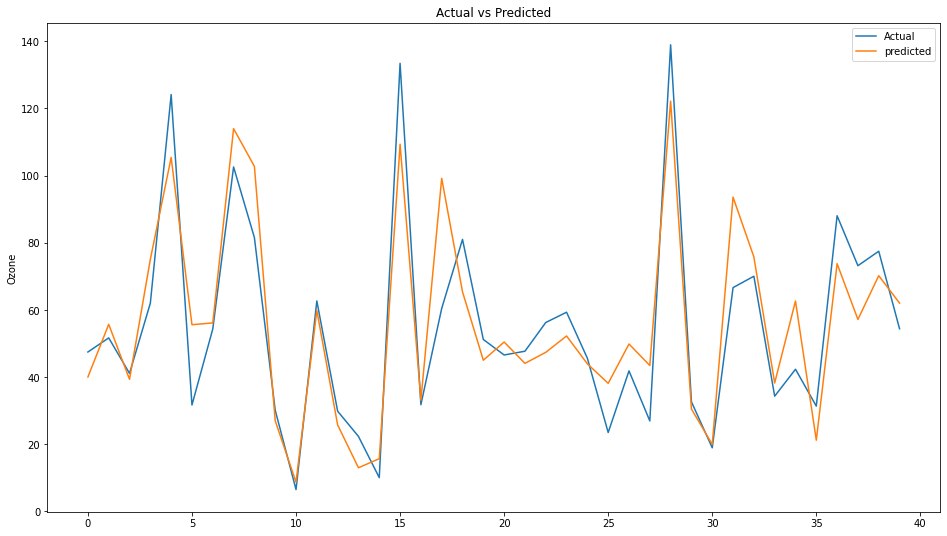

In [24]:
actual = y_test[300:340]
pred = yPredxgb[300:340]
plt.figure(figsize=(16,9))
plt.plot( list(actual))
plt.plot( list(pred))
plt.title("Actual vs Predicted")
plt.ylabel("Ozone")
plt.legend(('Actual','predicted'))
plt.show()

In [25]:
corr_matrix = (df2.corr())
corr_matrix = round(corr_matrix, 6)
print("correlation between O3 other pollutants: YEAR or something-")
print(corr_matrix['O3P24'].sort_values(ascending = False))

correlation between O3 other pollutants: YEAR or something-
O3P24      1.000000
O3         0.580418
NO2        0.385840
SO2        0.372074
PM10       0.313223
PM2.5      0.239384
NOx        0.229647
Temp       0.223676
NO         0.213742
Toluene    0.134108
Benzene    0.087211
NH3       -0.040889
Press     -0.089154
Cloud     -0.136926
Xylene    -0.140136
Humid     -0.247126
CO        -0.266367
Name: O3P24, dtype: float64


In [32]:
## calculating 8-hour midpoint:
'''
calculated by taking the average of the current hour, previous four, and future 3 hours
make a column calculating the average

naw screw this i'm just going to use the hourly data to get a result

'''

# create a function converting hourly ppb to air quality index (using this https://forum.airnowtech.org/t/the-aqi-equation/169)
'''
0 : GOOD                : 0-50
1 : MODERATE            : 51-100
2 : UNHEALTHY FOR SENS. : 101-150
3 : UNHEALTHY           : 151-200
4 : VERY UNHEALTHY      : 201-300

df['employrate'] = np.where(
   (df['employrate'] <=55) & (df['employrate'] > 50) , 11, df['employrate']
   )

'''


#df3['Actual AQI'] = df3['Actual O3']
#df['B'] = np.where(df['B'].between(8,11), 0, df['B'])

# df3['Actual AQI'] = (np.where(df3['Actual AQI'].between(0,51), 0, df3['Actual AQI']))
# df3['Actual AQI'] = (np.where(df3['Actual AQI'].between(51,101), 1, df3['Actual AQI']))
# df3['Actual AQI'] = (np.where(df3['Actual AQI'].between(101,151), 2, df3['Actual AQI']))
# df3['Actual AQI'] = (np.where(df3['Actual AQI'].between(151,201), 3, df3['Actual AQI']))
# df3['Actual AQI'] = (np.where(df3['Actual AQI'].between(201,300), 4, df3['Actual AQI']))

# df3['Predicted AQI'] = df3['Predicted O3']

# df3['Predicted AQI'] = (np.where(df3['Predicted AQI'].between(0,51), 0, df3['Predicted AQI']))
# df3['Predicted AQI'] = (np.where(df3['Predicted AQI'].between(51,101), 1, df3['Predicted AQI']))
# df3['Predicted AQI'] = (np.where(df3['Predicted AQI'].between(101,151), 2, df3['Predicted AQI']))
# df3['Predicted AQI'] = (np.where(df3['Predicted AQI'].between(151,201), 3, df3['Predicted AQI']))
# df3['Predicted AQI'] = (np.where(df3['Predicted AQI'].between(201,300), 4, df3['Predicted AQI']))


# display(df3)

# print(df3['Actual AQI'].value_counts(sort=True))
# print(df3['Predicted AQI'].value_counts(sort=True))
#display(df3)


"\n0 : GOOD                : 0-50\n1 : MODERATE            : 51-100\n2 : UNHEALTHY FOR SENS. : 101-150\n3 : UNHEALTHY           : 151-200\n4 : VERY UNHEALTHY      : 201-300\n\ndf['employrate'] = np.where(\n   (df['employrate'] <=55) & (df['employrate'] > 50) , 11, df['employrate']\n   )\n\n"

In [ ]:
print("All scores from seasonal retraining: ", r2Scorewin, r2scorefall, r2scoresum, r2scoremons)